<a href="https://colab.research.google.com/github/ifyyoyo/dallas-shooting/blob/main/Dallas_shooting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Relevant libraries needed

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

connect to SQLITE database

In [2]:
con = sqlite3.connect('dallas-ois.sqlite')

Read data into Dataframe

In [3]:
incidents = pd.read_sql('SELECT * FROM incidents',con)
officers = pd.read_sql('SELECT * FROM officers',con)
subjects = pd.read_sql('SELECT * FROM subjects',con)

Explore the length of the data

In [4]:
len(incidents), len(officers), len(subjects)

(219, 370, 223)

create a dataset subject_incident as officers joined with incidents

In [5]:
subject_incident = pd.read_sql('SELECT * FROM subjects Join incidents ON subjects.case_number=incidents.case_number', con)

In [6]:
len(subject_incident)

223

check for null

In [7]:
subject_incident.isnull().sum()


case_number                     0
race                            0
gender                          0
last_name                       0
first_name                     18
full_name                       0
case_number                     0
date                            0
location                        0
subject_statuses                0
subject_weapon                  0
subjects                        0
subject_count                   0
officers                        0
officer_count                   0
grand_jury_disposition         88
attorney_general_forms_url    221
summary_url                     3
summary_text                    3
latitude                        9
longitude                       9
dtype: int64

In [8]:
subject_incident.groupby('subject_statuses').count()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
subject_statuses,,,,,,,,,,,,,,,,,,,,
1 Deceased 1 Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
2 Injured,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Deceased,69,69,69,69,67,69,69,69,69,69,69,69,69,69,67,1,67,67,68,68
Deceased Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
Injured,60,60,60,60,60,60,60,60,60,60,60,60,60,60,58,1,60,60,57,57
Other,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,2,2,1,1
Shoot and Miss,87,87,87,87,71,87,87,87,87,87,87,87,87,87,4,0,86,86,83,83


In [9]:
subject_incident.groupby('race').count()

,case_number,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
race,,,,,,,,,,,,,,,,,,,,
A,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,2,2
B,111,111,111,104,111,111,111,111,111,111,111,111,111,111,67,0,109,109,106,106
L,72,72,72,61,72,72,72,72,72,72,72,72,72,72,37,2,71,71,68,68
W,38,38,38,38,38,38,38,38,38,38,38,38,38,38,31,0,38,38,38,38


create a dataset with the features; race, subject_statuses, latitude and longitude

In [10]:
dataset = subject_incident[['race','subject_statuses','latitude','longitude']].dropna()

In [11]:
len(dataset)

214

map race and subject_statuses columns to be able to visualize

In [12]:
mapping = {'B':'blue','A':'red','L':'cyan','W':'yellow'}
dataset['race'] = dataset['race'].apply(lambda X:mapping[X])

In [13]:
mapping = {'Deceased':1000,'Injured':500,'Shooot and Miss':250}
dataset['subject_statuses'] = dataset['subject_statuses'].apply(lambda x:mapping.get(x,100))

visualize data

<Axes: title={'center': 'Dallas Police Shooting'}, xlabel='longitude', ylabel='latitude'>

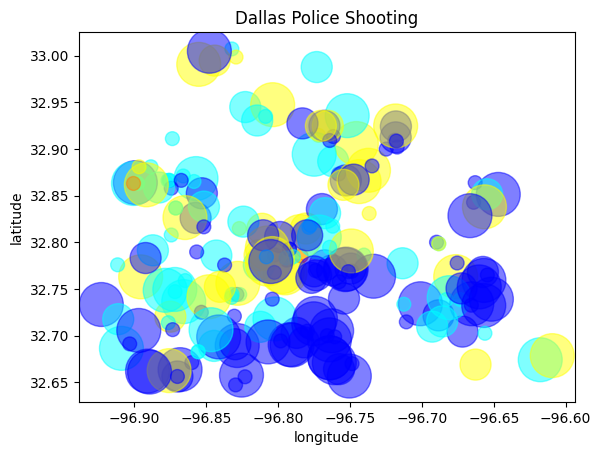

In [14]:
dataset.plot.scatter(x="longitude",y="latitude",s="subject_statuses",c="race", alpha=.5,title='Dallas Police Shooting')

visualize on the map to make the message clearer

In [15]:
import folium
m = folium.Map(location=[32.8,-96.7])

In [16]:
m

In [17]:
for _, row in dataset.iterrows():
  folium.CircleMarker(
      location=[row['latitude'],row['longitude']],
      radius = row['subject_statuses'] //100,
      color = row['race'],
      fill = True,
      fill_color = ['race']
  ).add_to(m)

In [18]:
m